<a href="https://colab.research.google.com/github/smit-collab/Data-analysis-for-Uber-trips/blob/master/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing all libraries 
import pandas as pd
import matplotlib.pyplot as plt
import folium
import html
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [90]:
# explorng the data
df = pd.read_csv("uber.csv")
df.shape


(829275, 4)

we can see that there are total 829,275 observations and four columns.

In [91]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [0]:
dmy = df.copy()

In [98]:
dmy['Date/Time'] = dmy['Date/Time'].map(pd.to_datetime) 
print(dmy.tail())

                 Date/Time      Lat      Lon    Base
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764


In [0]:
getting date of month
def getDateOfMonth(dt):
  return dt.day
dmy['day'] = dmy['Date/Time'].map(getDateOfMonth)

def getWeekDay(dt):
  return dt.weekday()
dmy['weekday'] = dmy['Date/Time'].map(getWeekDay)  

def getHour(dt):
  return dt.hour
dmy['hour'] = dmy['Date/Time'].map(getHour)  


In [164]:
print(dmy.tail())

                 Date/Time      Lat      Lon    Base  day  weekday  hour
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764   31        6    23
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764   31        6    23
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764   31        6    23
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764   31        6    23
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764   31        6    23


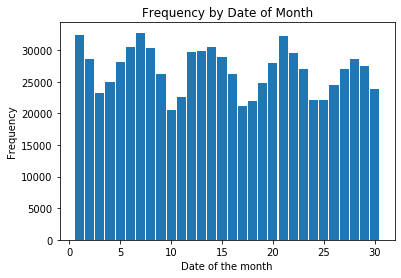

In [218]:
# Analyzing by date in the data
plt.hist(dmy.day,bins=30,range=(0.5,30.5) ,rwidth=.9)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Date of Month');

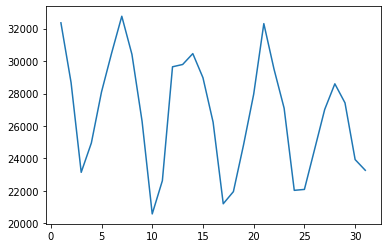

In [215]:
# counting number of rows. ie getting number of records per day.
# visualizing using another chart
def countRow(row):
  return len(row)
orderByDate = dmy.groupby('day').apply(countRow)  
# print(orderByDate)
plt.plot(orderByDate)

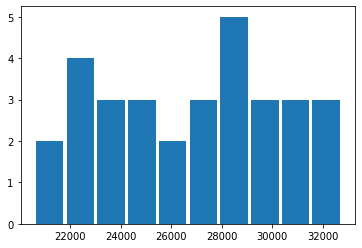

In [217]:
orderByDateSorted = orderByDate.sort_values()
# plt.hist(range(1,31),orderByDateSorted)
# print(orderByDateSorted)
plt.hist(orderByDateSorted,rwidth=.9);


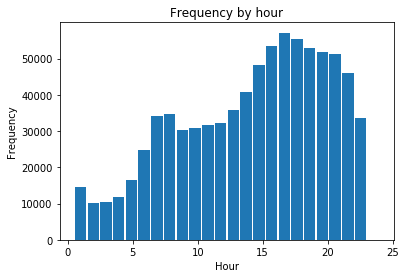

In [220]:
# Analyzing by hour in the data
plt.hist(dmy.hour,bins=24,range=(0.5,24) ,rwidth=.9)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by hour');

Text(0.5, 1.0, 'Frequency by Day')

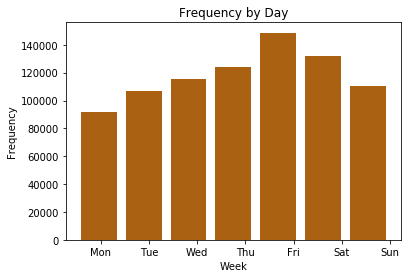

In [221]:
# Analyzing by week in the data
plt.hist(dmy.weekday,bins=7,range=(-0.5,6),rwidth=.8 ,color="#AA6112")
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Frequency by Day')

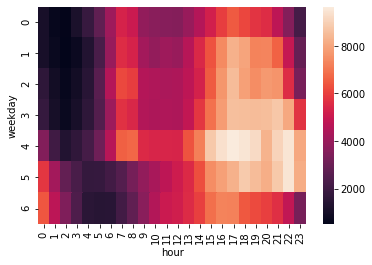

In [176]:
# analyzing hour and day together using seaborn
tog = dmy.groupby('weekday hour'.split()).apply(countRow).unstack()
sns.heatmap(tog)

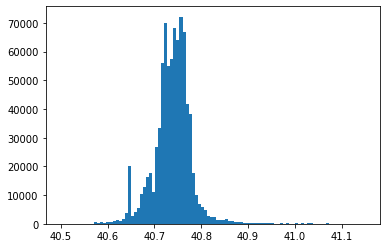

In [183]:
# analyzing the latitude and longitude.
plt.hist(dmy['Lat'],bins=100,range=(40.5,41.15));


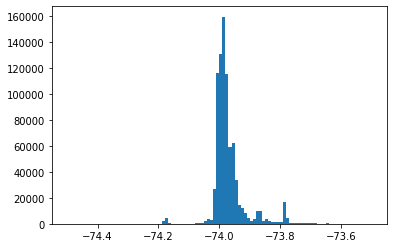

In [186]:
plt.hist(dmy['Lon'],bins=100,range=(-74.5,-73.5));

''

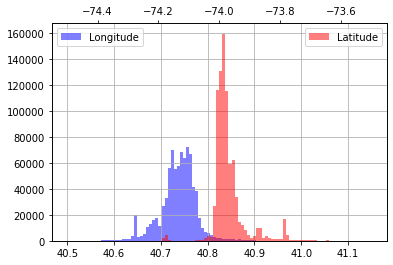

In [199]:
# Now analyzing them together
plt.hist(dmy['Lat'],bins=100,range=(40.5,41.15),color='b',alpha=.5,label='Longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(dmy['Lon'],bins=100,range=(-74.5,-73.5),color='r',alpha=.5,label='Latitude')
plt.legend(loc='upper right')
;

(40.5, 41.15)

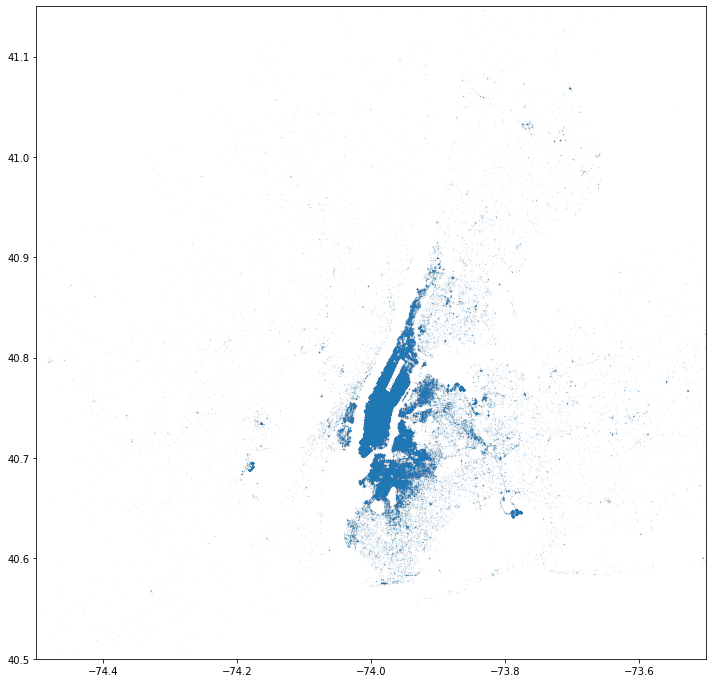

In [211]:
# another way of visualizing the latitude and longitude 
plt.figure(figsize=(12,12))
plt.plot(dmy['Lon'],dmy['Lat'],'.',ms=.1,alpha=.5)
plt.xlim(-74.5,-73.5)
plt.ylim(40.5,41.15)

From the chart we can see better visualization of NYC neighborhoods. There is Manhattan area and some people go to NJ.  

In [0]:
# making a copy
df1 = df.copy()

In [212]:
# selecting features
dfClusters =  df1[['Lat','Lon']]
print(dfClusters.dtypes)

Lat    float64
Lon    float64
dtype: object


In [213]:
print(dfClusters.head(4))

       Lat      Lon
0  40.7366 -73.9906
1  40.7260 -73.9918
2  40.7209 -74.0507
3  40.7387 -73.9856


To use k-means clustering first need to find out k value. So below is the elbow plot.

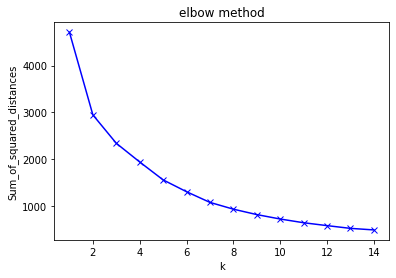

In [5]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,max_iter=300,random_state=12345)
    km = km.fit(dfClusters)
    Sum_of_squared_distances.append(km.inertia_)

# to find optimal k
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('elbow method')
plt.show()


If we observe the chart properly then we can see that as the sum of squared distance decreases with the number of clusters increases.

After k=6 there is significant reduction. so we can choose 6 or 7 as as the cluster. 

In [214]:
# assigning a number of cluster in K means algorithm.
kmeans=KMeans(n_clusters=7,max_iter=300,random_state=12345)
kmeans.fit(dfClusters)
labels=kmeans.labels_
dfClusters['clusters'] = labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
print(dfClusters.head(10))

       Lat      Lon  clusters
0  40.7366 -73.9906         1
1  40.7260 -73.9918         1
2  40.7209 -74.0507         1
3  40.7387 -73.9856         1
4  40.7323 -74.0077         1
5  40.7349 -74.0033         1
6  40.7279 -73.9542         4
7  40.7210 -73.9937         1
8  40.7195 -74.0060         1
9  40.7448 -73.9799         1


In [29]:
# storing cluster centroids
cent = kmeans.cluster_centers_
print(cent)

newFrame = pd.DataFrame(cent)
newFrame.columns=['Lat','Lon']
print(newFrame)

[[ 40.76748526 -73.97120297]
 [ 40.73126974 -73.99763239]
 [ 40.69997732 -74.20075322]
 [ 40.79834737 -73.87388177]
 [ 40.68650391 -73.96319507]
 [ 40.66098763 -73.78257563]
 [ 40.76959376 -73.46662719]]
         Lat        Lon
0  40.767485 -73.971203
1  40.731270 -73.997632
2  40.699977 -74.200753
3  40.798347 -73.873882
4  40.686504 -73.963195
5  40.660988 -73.782576
6  40.769594 -73.466627


We can see that there are 7 centroids from the output. For eg 40.767(latitude) and -73.971(longitude) is the centroid for cluster 1 and so on.

In [30]:
# predicting a new location.
anotherLocation = [(40.6556,-73.5631)]
kmeans.predict(anotherLocation)

array([6], dtype=int32)

In [31]:
# using maps to identify the Latitude and Longitude.
import folium
import html
from IPython.display import display

centroid = newFrame.values.tolist()
map=folium.Map(location=[40.79658012 ,-73.87341742],zoom_start=25)
for point in range(0,len(centroid)):
  folium.Marker(centroid[point],popup=folium.Popup(centroid[point])).add_to(map)      
map

In [0]:
# saving a html file of the map
map.save('index.html')

We can observe that all the 7 centroids have been marked on the map.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


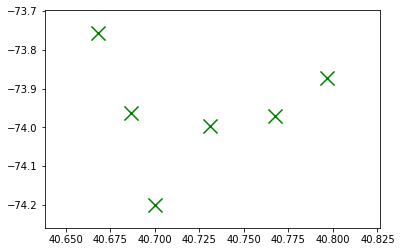

In [27]:
# plotting centroids in the scatter plot
plt.scatter(newFrame['Lat'],newFrame['Lon'],marker='x',color='G',s=200)
plt.show()

We can observe the scatter plot and the google map chart but the chart using folium shows better visualization of the latitude and longitude.

In [62]:
# predicting another location
anotherLocation1 = [(40.7332,-74.2342)]
kmeans.predict(anotherLocation1)

array([2], dtype=int32)

So the new latitude and longitude value 40.7332,-74.2342 should be assigned to the cluster 2 . This will be as distance from the centroid of cluster 2 is minimum. So the uber ride will come closer to cluster 2.